# <font color=green>OSA case study</font>
## <font color=dark>Dimensionality: Principal Component Analysis (PCA) <font>
    


<font size= 5 color=magenta>----------------------------------------------------------------</font>
<font size= 5 color=magenta>----------------------------------------------------------------</font>

## Read the aggregated (clinical variables + speech features) Excel file for exteme male cases

In [2]:
# Import pandas
import pandas as pd

# Read Excell with extreme male cases
file = 'OSA_Aggregated_UPM.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

# Print the sheet names
print(xl.sheet_names)


['Sheet1']


In [3]:

# Load a sheet into a DataFrame by name: df_OSA_extreme
df_OSA_inner = xl.parse('Sheet1')

In [4]:
df_OSA_inner.head(2)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI,A_Form1,...,O_Ancho3,O_Ancho4,U_Form1,U_Form2,U_Form3,U_Form4,U_Ancho1,U_Ancho2,U_Ancho3,U_Ancho4
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927,746.822118,...,164.953071,223.771504,328.075500,757.032914,2565.730496,3024.500134,74.718076,88.331369,128.496457,379.432142
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906,741.095216,...,74.584464,216.244108,337.409601,735.000000,2532.000000,4132.186568,68.657539,192.000000,134.000000,264.337720


In [6]:
# Prepare X and Y data 

import pandas
import numpy as np

array = df_OSA_inner.values

# Select Features from columns 3 to 6 and 8 to 48
X = array[:,np.r_[3:7,8:49]]

# Classes are in possition 7 (OSA) 
Y = array[:,7]

* ### Performing PCA

In [8]:
X.shape

(174, 45)

In [11]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
## perform PCA (NOTE: no labels Y -> UNSUPERVISED)

n = X.shape[1]

pca = PCA(n_components = n)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca.fit_transform(X)

array([[ 2.51701700e+01, -3.48326143e+02,  1.09223756e+02, ...,
         4.98735575e+00,  1.04683011e+00, -2.65259505e-01],
       [ 1.67815253e+02,  3.66294501e+02, -1.00610735e+03, ...,
        -9.43529265e+00,  5.43244595e-01,  3.29509520e-01],
       [ 2.11430847e+02,  1.95283355e+02,  6.97199249e+01, ...,
         1.65890083e+00, -1.05630355e+00,  4.44085907e-02],
       ...,
       [-9.62357767e+01, -1.10867871e+02,  5.67795424e+02, ...,
        -3.04582932e+00, -1.89543087e+00, -2.34820634e-02],
       [ 9.31834016e+02, -3.79549100e+02, -7.63326366e+01, ...,
        -1.16052834e+00, -1.49528942e+00,  4.98385738e-01],
       [ 1.83898909e+02, -8.78056512e+01,  2.11152737e+02, ...,
         2.64241344e+00, -2.39404596e+00,  5.67331446e-01]])

<font color=red size=5>NOTE:</font>
- ### Display some PCA components
- ### Do you see something strange?

In [14]:
## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

<BarContainer object of 45 artists>

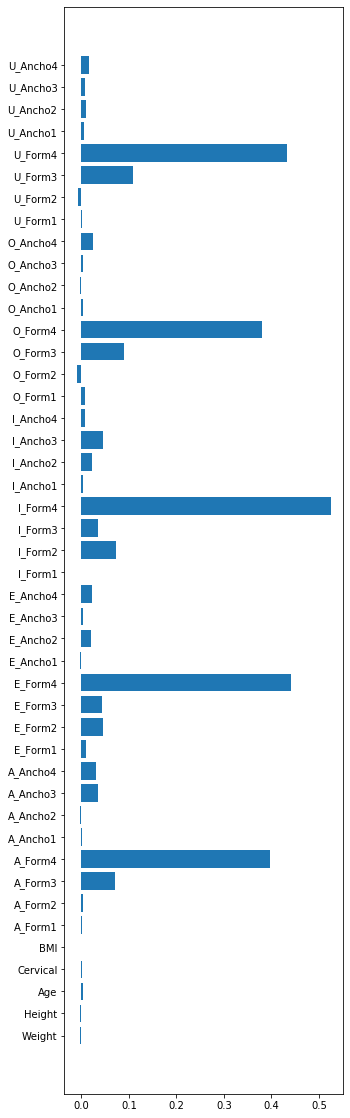

In [15]:
predictors = df_OSA_inner.columns[np.r_[3:7,8:49]]

plt.figure(figsize=(5,20))
plt.barh(predictors,xvector)

<font color=red size=5>Remember the importance of Scaling before PCA!!!:</font>


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

pca.fit(X_scaled)

# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

In [17]:
# Verify normalization:

# Zero mean
print('Features means after normalization \n',
     list(np.mean(X_scaled,axis=0)))

print('\nStandard deviation after normalization \n',
     list(np.std(X_scaled,axis=0)))

print('\nStandard deviation before normalization \n',
     list(np.std(np.array(X, dtype=np.float64),axis=0)))

Features means after normalization 
 [-3.100967758435782e-16, -1.2639952941278363e-15, -6.125368411725002e-17, -2.9605947323337506e-16, -5.88290591209422e-16, 1.6742673658715004e-15, -1.1740289455806254e-16, 9.62193288008469e-16, 1.1229842088162504e-16, -2.3480578911612507e-16, 1.9396999970462506e-16, -5.997756569814064e-17, -1.3271631558737505e-16, 1.4241481557260629e-15, -2.7934232194304225e-15, -2.974632034943954e-15, -1.4420138135935942e-15, -1.5823868396956255e-16, -3.062684205862501e-17, -4.083578941150001e-17, 2.245968417632501e-16, -8.983873670530003e-16, 2.868714206157876e-15, -1.6717151290332817e-15, -3.317907889684376e-15, 9.188052617587502e-17, 1.595148023886719e-16, -2.8585052588050007e-16, 4.951339466144377e-16, 1.0693872352136566e-15, 2.8891321008636257e-15, -1.4292526294025004e-16, -2.1821624966770318e-15, 1.0208947352875003e-16, 1.0208947352875003e-16, 2.1438789441037507e-16, 3.573131573506251e-17, -5.308652623495002e-16, 9.72402235361344e-16, -1.6742673658715004e-15, 

* #### Plot after scaling

<BarContainer object of 45 artists>

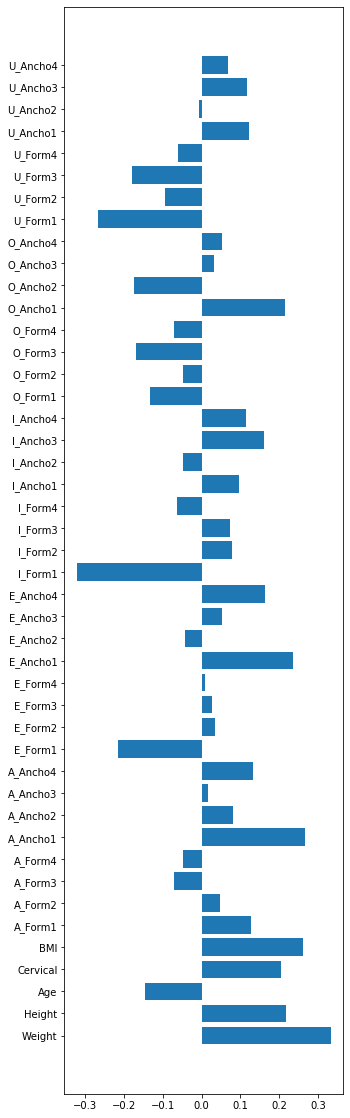

In [18]:
predictors = df_OSA_inner.columns[np.r_[3:7,8:49]]

plt.figure(figsize=(5,20))
plt.barh(predictors,yvector)

* ### Cumulative explained variance
        How many dimensions to keep? 

In [37]:
pca.explained_variance_ratio_

array([2.36293911e-01, 1.53007206e-01, 1.09169188e-01, 8.76995446e-02,
       7.53694978e-02, 5.89067832e-02, 4.12690010e-02, 3.18192626e-02,
       2.64143613e-02, 2.13739635e-02, 2.02994279e-02, 1.80428386e-02,
       1.36054263e-02, 1.30916456e-02, 1.06661960e-02, 9.16512339e-03,
       8.78631867e-03, 7.16553621e-03, 6.96795954e-03, 6.26299837e-03,
       5.57664237e-03, 5.33599855e-03, 4.60517669e-03, 4.51327548e-03,
       3.96043956e-03, 3.10850469e-03, 3.02684145e-03, 2.70867599e-03,
       2.19498568e-03, 1.95405370e-03, 1.47144741e-03, 1.25686530e-03,
       1.11106973e-03, 1.00291099e-03, 6.15275967e-04, 5.76335578e-04,
       3.83094378e-04, 3.44951541e-04, 3.01127646e-04, 2.78625765e-04,
       2.04909875e-04, 6.72518984e-05, 2.25716283e-05, 2.72286601e-06,
       5.54809832e-08])

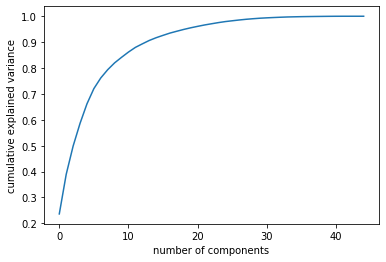

In [38]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [42]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
d

20

* ### Project data

In [20]:
## project data into PC space

xs = pca.transform(X_scaled)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(X_scaled)[:,1]


In [21]:
X.shape

(174, 45)

In [22]:
xs.shape

(174,)

<font color=red size=4>Understand biplot representation</font>

In [23]:
# This is to plot as a vector the effect
# for every original factor (or variable)
# into the PC1 PC2 space
# Biplot

coeff = np.transpose(pca.components_[0:2, :])

print(coeff)

[[-8.98579856e-02  3.32943320e-01]
 [-1.53235514e-01  2.18642951e-01]
 [-9.01978436e-02 -1.46158875e-01]
 [-1.49084996e-01  2.04114826e-01]
 [-3.21681904e-02  2.61749514e-01]
 [ 2.69963433e-01  1.28445243e-01]
 [ 2.85585956e-01  4.76311217e-02]
 [ 2.25339670e-01 -7.09399643e-02]
 [ 3.17596985e-02 -4.86195141e-02]
 [ 1.14976693e-01  2.65795573e-01]
 [ 3.32022478e-02  8.07681851e-02]
 [ 5.67773758e-02  1.55178877e-02]
 [ 1.39616451e-01  1.33435417e-01]
 [ 1.65785055e-01 -2.16449418e-01]
 [ 3.28948197e-01  3.51611991e-02]
 [ 3.04341569e-01  2.54349873e-02]
 [ 6.07234133e-02  7.43302663e-03]
 [ 1.86831712e-01  2.36767574e-01]
 [ 5.03618672e-02 -4.40517629e-02]
 [ 7.34385812e-02  5.23723693e-02]
 [ 1.18305280e-01  1.63674733e-01]
 [ 6.51507064e-02 -3.21128327e-01]
 [ 3.18060493e-01  7.94314754e-02]
 [ 1.73531822e-01  7.22105168e-02]
 [ 1.10356164e-01 -6.26040486e-02]
 [ 1.16387346e-01  9.69290291e-02]
 [ 6.92532126e-02 -4.86485429e-02]
 [ 1.83249978e-01  1.59742333e-01]
 [ 6.83525254e-02  1

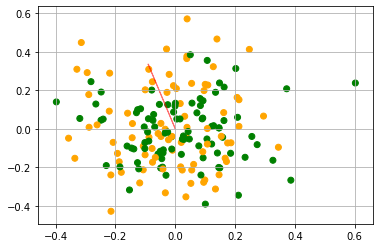

In [24]:
# Scale X and Y axis to better see the biplot

scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

color= ['orange' if l == 'Severe' else 'green' for l in df_OSA_inner['OSA']]

plt.scatter(xs * scalex ,ys * scaley, c = color)

plt.arrow(0, 0, coeff[0,0], coeff[0,1],color = 'red',alpha = 1.5)
plt.grid()

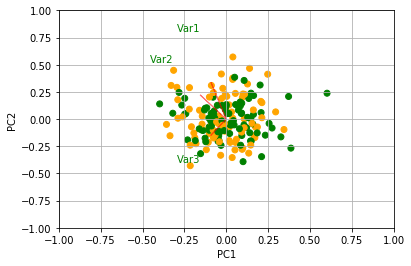

In [25]:
x_new = pca.transform(X_scaled)

def myplot(score,coeff,n_var,labels=None):
    # n_var number of variables to show in biplot
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = color)
    
    plot_scale = 2.5
    
    for i in range(n_var):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* plot_scale, coeff[i,1] * plot_scale, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* plot_scale, coeff[i,1] * plot_scale, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),3)
plt.show()

<font color=   #FF5733   face="times, serif" size=5>=========================================<br>Dimensionality reduction using<br> **t-Distributed Stochastic Neighbouring Entities (t-SNE)**

<font color= #792c35 face="times, bold" size=4>t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

<font color= #eb0a3a size=4>How to Use t-SNE Effectively:</font>

### Although extremely useful for visualizing high-dimensional data, t-SNE plots can sometimes be mysterious or misleading. By exploring how it behaves in simple cases, we can learn to use it more effectively.
See https://distill.pub/2016/misread-tsne/

In [47]:
from sklearn.manifold import TSNE



OSA_tsne = TSNE(random_state=123).fit_transform(X)



In [52]:
OSA_tsne.shape

(174, 2)

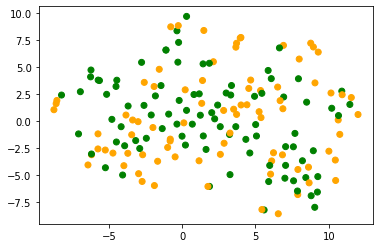

In [49]:
plt.scatter(OSA_tsne[:,0] ,OSA_tsne[:,1], c = color)

## See: http://projector.tensorflow.org/ 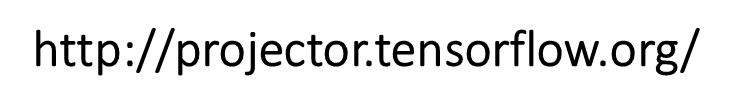